In [1]:
"""
importing necessary libraries
"""
import numpy as np
import pandas as pd
import csv

In [2]:
from yellowbrick.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier

In [3]:
"""
importing training data
"""
x_train = pd.read_csv('df_train_2.csv')
x_train

,able,abstract,access,access button,accessories,accessory,accord,accurate,acer,achieve,...,yellow,yellow sapphire,yet,yoga,you,young,youth,zip,zipper,zirconia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74996,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
"""
importing testing data
"""
x_test = pd.read_csv('df_test_2.csv')
x_test

,able,abstract,access,access button,accessories,accessory,accord,accurate,acer,achieve,...,yellow,yellow sapphire,yet,yoga,you,young,youth,zip,zipper,zirconia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y_train = pd.read_csv('y_train.csv', header = None)
y_train = np.array(y_train.values.reshape(-1), dtype = int)
y_train

array([10, 99,  8, ..., 16,  3, 16])

In [6]:
y_test = pd.read_csv('y_test.csv', header = None)
y_test = np.array(y_test.values.reshape(-1), dtype = int)
y_test 

array([11, 12, 11, ...,  6, 57, 42])

In [29]:
"""
Random forest classifier with default parametes
"""
rf1 = RandomForestClassifier()
rf1.fit(x_train, y_train)
print(rf1.score(x_train, y_train)) # training score
print(rf1.score(x_test, y_test)) # testing score

0.9984666666666666
0.88404


In [35]:
rf1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
"""
now validation curves are made to choose the best value of the parameters
"""

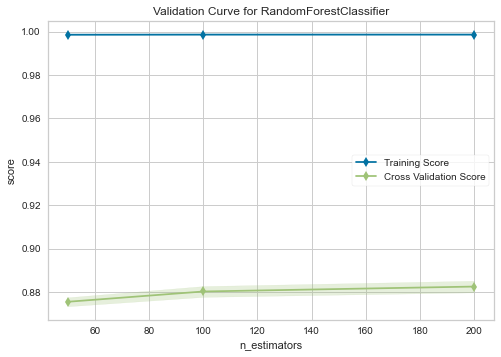

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                param_name='n_estimators', param_range=array([ 50, 100, 200]),
                scoring='accuracy')


In [33]:
# changing number of trees
n_trees = [50,100,200,300]
print(validation_curve(RandomForestClassifier(), X = x_train, y = y_train, param_name = 'n_estimators',
                 param_range = n_trees, cv = 5, scoring = "accuracy", n_jobs=-1))

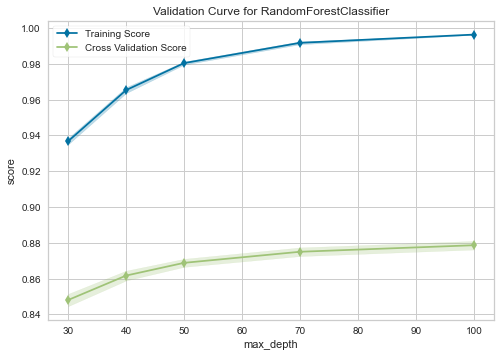

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                param_name='max_depth',
                param_range=array([ 30,  40,  50,  70, 100]),
                scoring='accuracy')


In [40]:
# changing max depth of tree
max_depth = [30,40, 50, 70, 100]
print(validation_curve(RandomForestClassifier(), X = x_train, y = y_train, param_name = 'max_depth',
                 param_range = max_depth, cv = 5, scoring = "accuracy", n_jobs=-1))

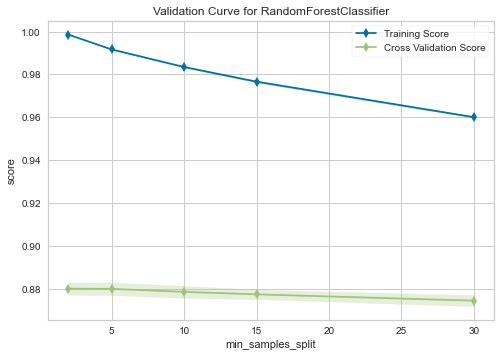

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>,
                cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                param_name='min_samples_split',
                param_range=array([ 2,  5, 10, 15, 30]), scoring='accuracy')


In [41]:
# changing min_sample_split
min_samples_split = [2,5,10,15,30]
print(validation_curve(RandomForestClassifier(), X = x_train, y = y_train, param_name = 'min_samples_split',
                 param_range = min_samples_split, cv = 5, scoring = "accuracy", n_jobs=-1))

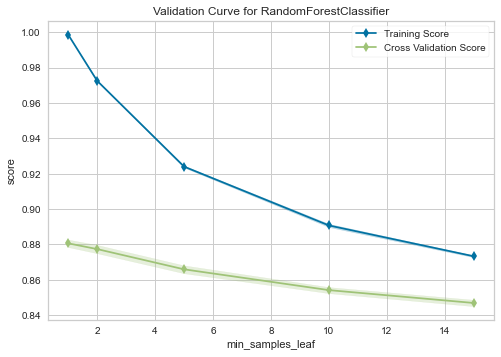

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_leaf', ylabel='score'>,
                cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                param_name='min_samples_leaf',
                param_range=array([ 1,  2,  5, 10, 15]), scoring='accuracy')


In [42]:
# changing min_sample_leaf
min_samples_leaf = [1,2,5,10,15]
print(validation_curve(RandomForestClassifier(), X = x_train, y = y_train, param_name = 'min_samples_leaf',
                 param_range = min_samples_leaf, cv = 5, scoring = "accuracy", n_jobs=-1))

In [34]:
from sklearn.model_selection import GridSearchCV

In [7]:
"""
training with the obtained value of parameters
It can be observed that overfitting is not present when compared to the default parameters
"""
rf1 = RandomForestClassifier(n_estimators=200, max_depth=100, min_samples_split = 5, min_samples_leaf=2)
rf1.fit(x_train, y_train)
print(rf1.score(x_train, y_train)) # training score
print(rf1.score(x_test, y_test)) # testing score

0.96592
0.87828


In [44]:
y_pred_train = rf1.predict(x_train)
y_pred_test = rf1.predict(x_test)

In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [47]:
"""
Classification report on training data
"""
print("classification_report train")
print(classification_report(y_train, y_pred_train))

classification_report train
              precision    recall  f1-score   support

           1       0.95      0.95      0.95       735
           2       0.93      0.94      0.93       755
           3       0.96      0.99      0.98       779
           4       0.95      0.98      0.97       752
           5       0.98      0.99      0.98       767
           6       0.97      0.98      0.97       730
           7       0.99      0.99      0.99       743
           8       0.99      1.00      1.00       754
           9       1.00      0.99      0.99       741
          10       0.96      0.98      0.97       753
          11       0.96      0.96      0.96       738
          12       0.93      0.93      0.93       744
          13       1.00      0.99      0.99       742
          14       0.95      0.96      0.95       762
          15       0.96      0.97      0.97       769
          16       0.87      0.71      0.78       729
          17       0.96      0.96      0.96       729

In [46]:
"""
Classification report on testing data
"""
print("classification_report test")
print(classification_report(y_test, y_pred_test))

classification_report test
              precision    recall  f1-score   support

           1       0.82      0.86      0.84       265
           2       0.84      0.77      0.81       245
           3       0.94      0.98      0.96       221
           4       0.95      0.90      0.92       248
           5       0.91      0.98      0.94       233
           6       0.87      0.87      0.87       270
           7       0.94      0.92      0.93       257
           8       0.97      0.98      0.98       246
           9       0.98      0.99      0.99       259
          10       0.85      0.87      0.86       247
          11       0.82      0.86      0.84       262
          12       0.79      0.79      0.79       256
          13       0.98      0.99      0.98       258
          14       0.84      0.88      0.86       238
          15       0.60      0.64      0.62       231
          16       0.59      0.23      0.33       271
          17       0.87      0.86      0.87       271
